In [1]:
# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento y modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Cargar el dataset
dataset_path = 'dataset_tesis.csv'
df = pd.read_csv(dataset_path)

# Mostrar primeras filas
df.head()


,Tiempo en Meses desde el Ultimo Mantenimiento,Horas de Uso Totales,Ciclos de Encendido/Apagado,Condiciones Ambientales - Optimo,Condiciones Ambientales - Aceptable,Condiciones Ambientales - Critico,Tipo de Aplicaciones - Bajo Uso,Tipo de Aplicaciones - Mediano Uso,Tipo de Aplicaciones - Alto Uso,Refrigeracion Adicional,Carga de Trabajo Promedio (%),Proximo Mantenimiento en Meses
0,1,1200,150,1,0,0,0,1,0,1,75,6
1,2,950,100,0,1,0,1,0,0,0,65,3
2,3,800,80,0,0,1,0,1,0,1,70,2
3,2,600,120,1,0,0,0,0,1,0,60,5
4,4,400,50,0,1,0,1,0,0,1,55,4


In [3]:
# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Tiempo en Meses desde el Ultimo Mantenimiento  1005 non-null   int64
 1   Horas de Uso Totales                           1005 non-null   int64
 2   Ciclos de Encendido/Apagado                    1005 non-null   int64
 3   Condiciones Ambientales - Optimo               1005 non-null   int64
 4   Condiciones Ambientales - Aceptable            1005 non-null   int64
 5   Condiciones Ambientales - Critico              1005 non-null   int64
 6   Tipo de Aplicaciones - Bajo Uso                1005 non-null   int64
 7   Tipo de Aplicaciones - Mediano Uso             1005 non-null   int64
 8   Tipo de Aplicaciones - Alto Uso                1005 non-null   int64
 9   Refrigeracion Adicional                        1005 non-null   int64
 10  

,Tiempo en Meses desde el Ultimo Mantenimiento,Horas de Uso Totales,Ciclos de Encendido/Apagado,Condiciones Ambientales - Optimo,Condiciones Ambientales - Aceptable,Condiciones Ambientales - Critico,Tipo de Aplicaciones - Bajo Uso,Tipo de Aplicaciones - Mediano Uso,Tipo de Aplicaciones - Alto Uso,Refrigeracion Adicional,Carga de Trabajo Promedio (%),Proximo Mantenimiento en Meses
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,6.356219,4006.754229,633.266667,0.333333,0.328358,0.338308,0.321393,0.346269,0.332338,0.513433,58.372139,2.277612
std,3.494799,1159.178677,158.578630,0.471639,0.469850,0.473370,0.467244,0.476017,0.471286,0.500068,22.581478,1.628172
min,1.000000,400.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,3.000000,3002.000000,499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,1.000000
50%,6.000000,4052.000000,642.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,1.000000
75%,9.000000,4985.000000,771.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79.000000,3.000000
max,12.000000,5991.000000,900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.000000,7.000000


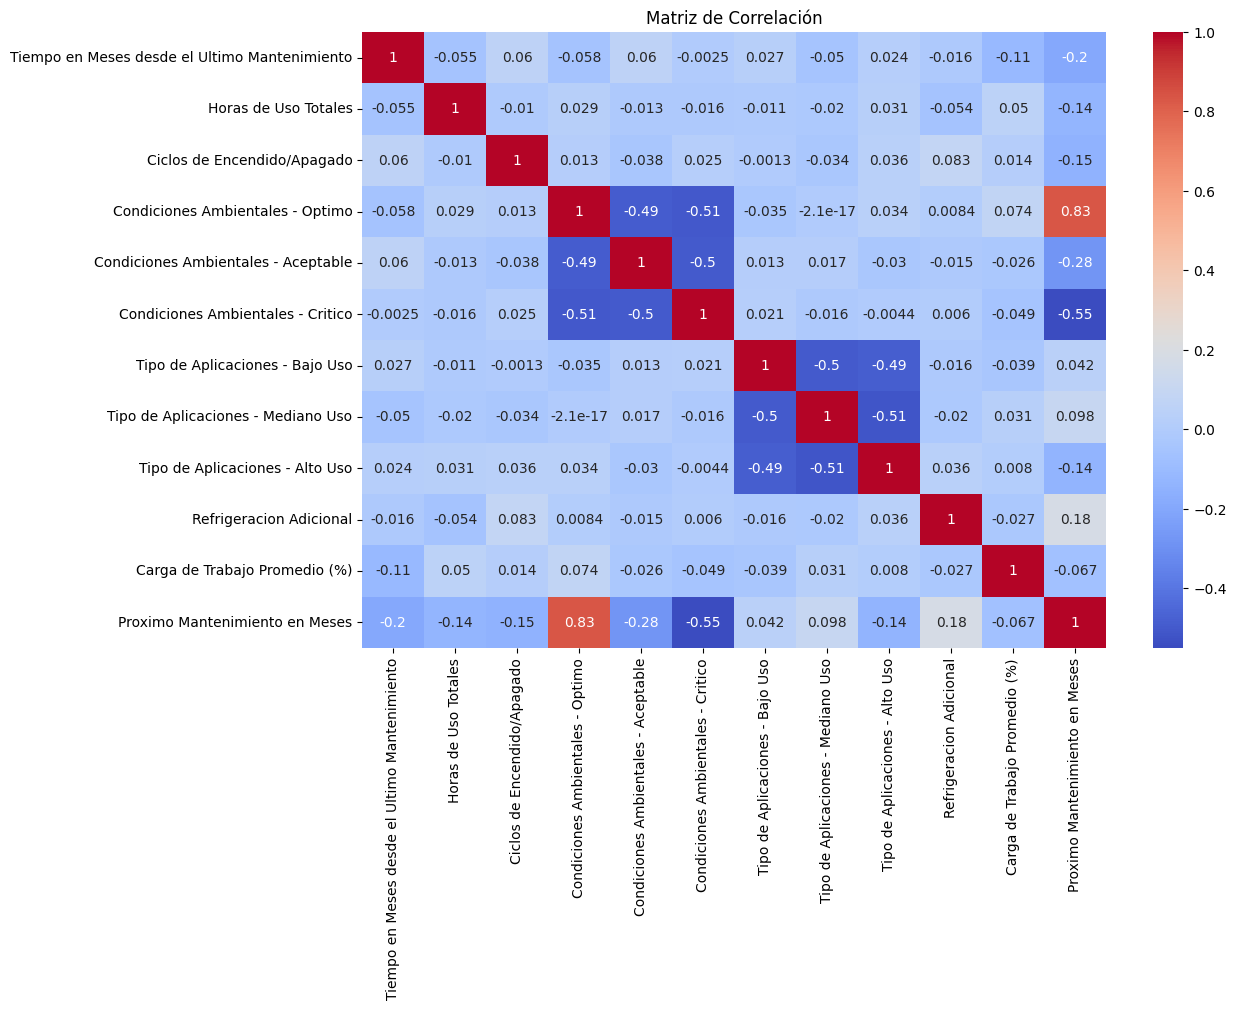

In [4]:
# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Matriz de correlación
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [5]:
# Definir X (variables independientes) y Y (variable objetivo)
X = df.drop('Proximo Mantenimiento en Meses', axis=1)
y = df['Proximo Mantenimiento en Meses']

# Dividir dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)

Datos de entrenamiento: (804, 11)
Datos de prueba: (201, 11)


In [6]:
# Inicializar y entrenar el modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicciones del modelo
y_pred = modelo_lr.predict(X_test)


In [7]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r2)


Mean Squared Error (MSE): 0.3244765242476395
Root Mean Squared Error (RMSE): 0.5696284089190422
Coeficiente de Determinación (R²): 0.864142353188566


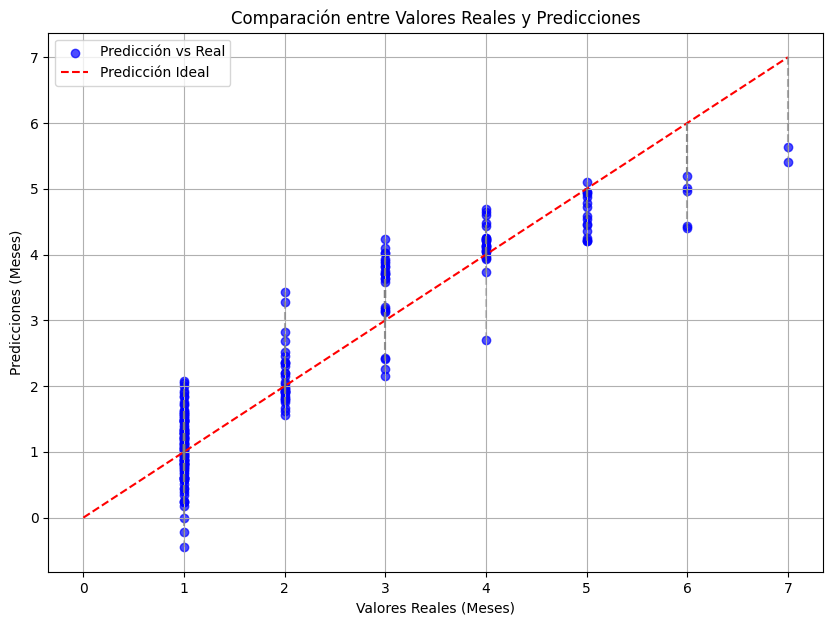

In [8]:
# Gráfico óptimo para comparar Valores Reales (eje X) vs Predicciones (eje Y)
plt.figure(figsize=(10, 7))

# Graficar puntos (cada punto es una muestra con valor real y predicho)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicción vs Real')

# Línea diagonal ideal (referencia perfecta)
max_valor = max(max(y_test), max(y_pred))
plt.plot([0, max_valor], [0, max_valor], color='red', linestyle='--', label='Predicción Ideal')

# Agregar segmentos que muestren el error
for i in range(len(y_test)):
    plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], y_pred[i]], color='gray', alpha=0.4, linestyle='--')

# Etiquetas
plt.xlabel('Valores Reales (Meses)')
plt.ylabel('Predicciones (Meses)')
plt.title('Comparación entre Valores Reales y Predicciones')

# Leyenda y grilla
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


In [9]:
import joblib

# Guardar modelo
joblib.dump(modelo_lr, 'modelo_mantenimiento.pkl')


['modelo_mantenimiento.pkl']